<a href="https://colab.research.google.com/github/bishin22/Bioinformatics_and_Practice_1/blob/main/Bioinformatics_practice_1_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 76 (delta 26), reused 59 (delta 15), pack-reused 0
Unpacking objects: 100% (76/76), 318.14 KiB | 3.18 MiB/s, done.
./
./root/
./root/.vimrc
./root/.condarc
./root/.profile
./root/.bashrc.biolab
./root/.tmux.conf
./root/.bin.priority/
./root/.bin.priority/pip2
./root/.bin.priority/pip
./root/.bin.priority/pip3
--2023-06-09 06:12:58--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73134376 (70M) [application/x-sh]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>]  69.75M   188MB/s    in 0.4s    

2023-06-09 06:12:58 (188 MB/

In [4]:
!ls -al /content/drive/MyDrive/생정실1프로젝트/binfo1-datapack1/

total 7162852
-r-------- 1 root root 1370036258 Apr 27 14:53 CLIP-35L33G.bam
-r-------- 1 root root    3118336 Apr 27 14:53 CLIP-35L33G.bam.bai
-r-------- 1 root root       7113 May 11 11:02 CLIP-let7g.bam
-r-------- 1 root root      14561 May 11 11:03 CLIP-let7g-gene.pileup
-r-------- 1 root root    2685065 May 11 11:02 CLIP-let7g.pileup
-r-------- 1 root root  883334756 Apr 27 14:53 gencode.gtf
-r-------- 1 root root   24065406 Apr 27 15:15 read-counts.txt
-r-------- 1 root root        751 Apr 27 15:15 read-counts.txt.summary
-r-------- 1 root root 1003658801 Apr 27 14:54 RNA-control.bam
-r-------- 1 root root    2276104 Apr 27 14:53 RNA-control.bam.bai
-r-------- 1 root root 1260991122 Apr 27 14:54 RNA-siLin28a.bam
-r-------- 1 root root    2710744 Apr 27 14:54 RNA-siLin28a.bam.bai
-r-------- 1 root root  981684502 Apr 27 14:54 RNA-siLuc.bam
-r-------- 1 root root    2606104 Apr 27 14:54 RNA-siLuc.bam.bai
-r-------- 1 root root  737352902 Apr 27 14:54 RPF-siLin28a.bam
-r-------- 1 r

In [5]:
!md5sum drive/MyDrive/생정실1프로젝트/binfo1-datapack1/*

# CLIP - OOO : antibody
# RNA-siLin28a : siRNA를 사용함
# RNA-siLuc : control of siLin28a
# RNA-control : CLIP에 대한 control
# RPF : ribosome foot print(마찬가지로 control은 siLuc)
# ribosome density : 

140aaf30bcb9276cc716f8699f04ddd6  drive/MyDrive/생정실1프로젝트/binfo1-datapack1/CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  drive/MyDrive/생정실1프로젝트/binfo1-datapack1/CLIP-35L33G.bam.bai
5d0265965487c33475f48869fc9df2d2  drive/MyDrive/생정실1프로젝트/binfo1-datapack1/CLIP-let7g.bam
4ea14471c5d4bf9ab1fd91b9a5b2193c  drive/MyDrive/생정실1프로젝트/binfo1-datapack1/CLIP-let7g-gene.pileup
a53f66a5575d4ac2d3b4c44af576d44d  drive/MyDrive/생정실1프로젝트/binfo1-datapack1/CLIP-let7g.pileup
d54d428f5872030c4ffc43058709b896  drive/MyDrive/생정실1프로젝트/binfo1-datapack1/gencode.gtf
2698e6c8e30005ebc0593d3b9e9b5c58  drive/MyDrive/생정실1프로젝트/binfo1-datapack1/read-counts.txt
7c9528c08ed2f1ae6e2de599db1aa8fb  drive/MyDrive/생정실1프로젝트/binfo1-datapack1/read-counts.txt.summary
328883a73d507eafbf5b60bd6b906201  drive/MyDrive/생정실1프로젝트/binfo1-datapack1/RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  drive/MyDrive/생정실1프로젝트/binfo1-datapack1/RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  drive/MyDrive/생정실1프로젝트/binfo1-datapack1/RNA-si

In [6]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:13
🔁 Restarting kernel...


In [7]:
!conda install samtools
!conda install bedtools
!conda install bioawk

Solving environment: - \ | / - \ | / - \ | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0



## Package Plan ##

  environment location: /root/conda

  added / updated specs:
    - samtools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    c-ares-1.19.0              |       h5eee18b_0         118 KB
    ca-certificates-2023.5.7   |       hbcca054_0         145 KB  conda-forge
    certifi-2023.5.7           |     pyhd8ed1ab_0         149 KB  conda-forge
    conda-23.5.0               |  py310hff52083_1        1006 KB  conda-forge
    curl-7.88.1                |       h5eee18b_0          88 KB
    krb5-1.

In [18]:
!conda install -y bedtools bioawk samtools

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bedtools
    - bioawk
    - samtools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bedtools-2.31.0            |       hf5e1c6e_2         1.5 MB  bioconda
    bioawk-1.0                 |       he4a0461_9         198 KB  bioconda
    boltons-23.0.0             |     pyhd8ed1ab_0         296 KB  conda-forge
    ca-certificates-2023.5.7   |       hbcca054_0         145 KB  conda-forge
    certifi-2023.5.7           |     pyhd8ed1ab_0         149 KB  conda-forge
    conda-23.3.1               |  py310hff52083_0         941 KB  conda-forge
    curl-7.88.1                |       hdc1c0ab_1          86 KB  conda-forge
    jsonpatch-1.32             

In [36]:
%cd /content/drive/MyDrive/생정실1프로젝트/binfo1-work/
# %cd : 거기로 아예 이동
# !cd : 갔다가 돌아옴

/content/drive/MyDrive/생정실1프로젝트/binfo1-work


# S2C 재현하기


## Mirlet7g
(C) Error frequency profiles as a function of position along the CLIP tags. Position within the tag was partitioned into 20 bins with the 5′-end of the reads as the leftmost bin (x axis). To avoid underestimation of errors at both ends, we replaced the sequences removed by terminal soft clippings with the original sequences obtained from sequencing. In the case of insertion errors, we assumed that the errors occur only at the left-side of a given base.

In [2]:
!grep -i mirlet7g gencode.gtf

chr9	ENSEMBL	gene	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; gene_type "miRNA"; gene_name "Mirlet7g"; level 3; mgi_id "MGI:2676800";
chr9	ENSEMBL	transcript	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; transcript_id "ENSMUST00000083506.3"; gene_type "miRNA"; gene_name "Mirlet7g"; transcript_type "miRNA"; transcript_name "Mirlet7g-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676800"; tag "basic";
chr9	ENSEMBL	exon	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; transcript_id "ENSMUST00000083506.3"; gene_type "miRNA"; gene_name "Mirlet7g"; transcript_type "miRNA"; transcript_name "Mirlet7g-201"; exon_number 1; exon_id "ENSMUSE00000522665.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676800"; tag "basic";


35L33G는 mouse antibody로 CLIP시 사용했던 antibody.
논문에서는 총 세개의 antibody를 사용하였음

- CLIP 중 let7g에 해당하는 부분 가져오기

In [20]:
!samtools view -b -o CLIP-let7g.bam CLIP-35L33G.bam chr9:106056039-106056126
!samtools view CLIP-let7g.bam | wc -l

163


In [21]:
!samtools view -c CLIP-let7g.bam

163


In [22]:
!samtools mpileup CLIP-let7g.bam > CLIP-let7g.pileup
!wc -l CLIP-let7g.pileup

[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000
68548 CLIP-let7g.pileup


In [23]:
!tail CLIP-let7g.pileup

chr9	106075630	N	9	aaaaaaaaa	GIHIGGHII
chr9	106075631	N	9	ggggggggg	=IFIE?GII
chr9	106075632	N	9	ggggggggg	4HGIGCBHI
chr9	106075633	N	9	ggggggggg	<IFIDADIH
chr9	106075634	N	9	ccccccccc	?EEIDEGII
chr9	106075635	N	9	ttttttttt	:GGFECDII
chr9	106075636	N	9	ccccccccc	4IDIB?CGI
chr9	106075637	N	9	aaaaaaaaa	7IGIGBCGI
chr9	106075638	N	9	ttttttttt	7GGIGDEGI
chr9	106075639	N	9	t$t$t$t$t$t$t$t$t$	>IGFDDDGH


CLIP-let7g.pileup에는 우리가 원하는 gene의 read가 모두 있음
- position 바깥도 읽은 read가 일부 포함되어 있음
- position 안쪽의 pileup만 고려해주면 됨

In [24]:
!awk '$2 >= 106056039 && $2 <= 106056126 { print $0; }' CLIP-let7g.pileup > CLIP-let7g-gene.pileup

Forward	Reverse	Meaning
- Base matches the reference base

. dot	
, comma	
- Base is a mismatch to the reference base

ACGTN	acgtn
- Reference skip (due to CIGAR “N”)

'>'/	<	
- Deletion of the reference base (CIGAR “D”)

'*'	/ */#	

In [25]:
!head CLIP-let7g-gene.pileup

chr9	106056039	N	9	<<<<<<<<<	BHEIG?DII
chr9	106056040	N	9	<<<<<<<<<	BHEIG?DII
chr9	106056041	N	9	<<<<<<<<<	BHEIG?DII
chr9	106056042	N	9	<<<<<<<<<	BHEIG?DII
chr9	106056043	N	9	<<<<<<<<<	BHEIG?DII
chr9	106056044	N	9	<<<<<<<<<	BHEIG?DII
chr9	106056045	N	32	<<<<<<<<<^HT^DT^IT^GT^HT^HT^IT^GT^IT^HT^HT^IT^IT^HT^HT^GT^HT^GT^HT^HT^HT^IT^GT	BHEIG?DIIG9GEGGIDGEGFGBG;DDGHDGG
chr9	106056046	N	32	<<<<<<<<<GGGGGGGGGGGGGGGGGGGGGGG	BHEIG?DIIG<GGGGIGGBGFG?G?GEGHHGG
chr9	106056047	N	32	<<<<<<<<<AAAAAAAAAAAAAAAAAAAAAAA	BHEIG?DIIG7GEGGI8GHGCG=D4GE@GHGG
chr9	106056048	N	32	<<<<<<<<<GGGGGGGGGGGGGGGGGGGGGGG	BHEIG?DIIG9GDGGIGGHEFGBG<GDGBHGG


In [26]:
pileup = pd.read_csv('CLIP-let7g-gene.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'])
pileup.head()

,chrom,pos,_ref,count,basereads,quals
0,chr9,106056039,N,9,<<<<<<<<<,BHEIG?DII
1,chr9,106056040,N,9,<<<<<<<<<,BHEIG?DII
2,chr9,106056041,N,9,<<<<<<<<<,BHEIG?DII
3,chr9,106056042,N,9,<<<<<<<<<,BHEIG?DII
4,chr9,106056043,N,9,<<<<<<<<<,BHEIG?DII


In [27]:
len(pileup.iloc[87]['basereads'])

30

In [28]:
toremove = re.compile('[<>$*#^]')
pileup['matches'] = pileup['basereads'].apply(lambda x: toremove.sub('', x)) # 해당 정규표현식에 대응되는 문자는 없애라

In [29]:
pileup[['chrom', 'pos', 'matches']]

,chrom,pos,matches
0,chr9,106056039,
1,chr9,106056040,
2,chr9,106056041,
3,chr9,106056042,
4,chr9,106056043,
...,...,...,...
83,chr9,106056122,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...
84,chr9,106056123,CCCCCCCCCCCCCCCCCCCCCC
85,chr9,106056124,AAAAAAAAAAAAAAAAAAAAAA
86,chr9,106056125,GGGGGGGGGGGGGGGGGGGGGG


In [30]:
pileup[pileup['pos'] == 106056094].iloc[0]['matches']

'GGGGGGAAAAAAAAGGGGGAAAAAAGCCGCAGGATGAGGTGATAAGGGAGGGGTGAAGGGCGGTGAAGGGGAAAAGAGAAAGAAAAATAAAGGGGGAGTGGGAGGAAGAAGAGAATA'

In [31]:
pileup[40:80]

,chrom,pos,_ref,count,basereads,quals,matches
40,chr9,106056079,N,45,<<<<<<<<<AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,BHEIG?DIID<ICGHIEGGDIGGGGGDFGGFGGFHIIHEHIHHGI,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
41,chr9,106056080,N,45,<<<<<<<<<TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT,BHEIG?DIIGBHDHGHGIEGIEGDGGGGBHIEGHHIIEEHIIIGG,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
42,chr9,106056081,N,45,<<<<<<<<<AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,BHEIG?DIIDDFDHHIDIDHIIDHBGGGGHFBGGHIIHEHIIIGG,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
43,chr9,106056082,N,45,<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC,BHEIG?DIIGBIEHHIGIGHIIGHGGGGGHIDHHHIIGGHIHHGI,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
44,chr9,106056083,N,45,<<<<<<<<<C$CCCCCCC$CCCC$C$CCCC$CC$CCC$CCCCCCCC...,BHEIG?DIIGBI>HHHBHBBIHFGGGDGGGIGGHHHIGGDIHHGI,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
45,chr9,106056084,N,43,<<<<<<<<<AAAAAAAAAAAAAAAAAAAAAAAAAAAAA^IA^IA^I...,BHEIG?DII@IEHGIIGHGHDGBFGHHHIHF@HIIIGIHIIID,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIAIAIAHA
46,chr9,106056085,N,43,<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC,BHEIG?DIICIBHHIICHGHGGGGGHHHIIGGEIIIGIIIIIH,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
47,chr9,106056086,N,43,<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC,BHEIG?DII=IBHHIICHFHGGGHBHDHIIGGGIIIGIIIIIH,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
48,chr9,106056087,N,43,<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC,BHEIG?DII7H0HHIH@HFHDDDDAGDHIIDDHIIIHIIIIIH,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
49,chr9,106056088,N,43,<<<<<<<<<GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG,BHEIG?DII;H=HHII@DFHDDGHDAGHIHGDHIIHF@IIIIH,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG


In [ ]:
# 이제 해야할 것
# rna-seq도 같은 방법으로 해당 부분 조사
# Polyclonal, 2J3도 같은 방법으로 해당 부분 조사
# error의 frequency를 조사(substitution, deletion, insertion)
# 그래프로 나타내기

mm9의 reference fastq 파일 다운받기

In [33]:
!wget --timestamping 'ftp://hgdownload.cse.ucsc.edu/goldenPath/mm9/chromosomes/chr9.fa.gz' -O chr9_mm9.fa.gz

SyntaxError: ignored

In [38]:
!pwd

/content/drive/MyDrive/생정실1프로젝트/binfo1-work


In [39]:
!gunzip chr9_mm9.fa.gz

In [40]:
!samtools mpileup -f chr9_mm9.fa CLIP-let7g.bam > CLIP-let7g_ref_mm9.pileup

[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000


In [41]:
!head CLIP-let7g_ref_mm9.pileup

chr9	106007092	A	9	^G,^I,^H,^I,^G,^G,^H,^I,^I,	<IFIGGHII
chr9	106007093	T	9	ggggggggg	AFGIEGDII
chr9	106007094	C	9	,,,,,,,,,	EHHIGAFEH
chr9	106007095	a	9	,,,,,,,,,	?HDIFA>II
chr9	106007096	t	9	aaaaaaaaa	EHHIG@CHH
chr9	106007097	t	9	,,,,,,,,,	=HGEGDFII
chr9	106007098	g	9	aaaaaaaaa	?HHIGDEII
chr9	106007099	g	9	,-2gc,-2gc,-2gc,-2gc,-2gc,-2gc,-2gc,-2gc,-2gc	?IEHGEDII
chr9	106007100	g	9	*********	8IBIBC@EI
chr9	106007101	c	9	*********	8IBIBC@EI


In [42]:
!awk '$2 >= 106056039 && $2 <= 106056126 { print $0; }' CLIP-let7g_ref_mm9.pileup > CLIP-let7g_ref_mm9-gene.pileup

In [43]:
!tail CLIP-let7g_ref_mm9-gene.pileup

chr9	106056117	A	9	<<<<<<<<<	BHEIG?DII
chr9	106056118	C	9	<<<<<<<<<	BHEIG?DII
chr9	106056119	A	9	<<<<<<<<<	BHEIG?DII
chr9	106056120	C	9	<<<<<<<<<	BHEIG?DII
chr9	106056121	G	9	<<<<<<<<<	BHEIG?DII
chr9	106056122	G	9	<<<<<<<<<	BHEIG?DII
chr9	106056123	G	9	<<<<<<<<<	BHEIG?DII
chr9	106056124	G	9	<<<<<<<<<	BHEIG?DII
chr9	106056125	A	9	<<<<<<<<<	BHEIG?DII
chr9	106056126	C	9	<<<<<<<<<	BHEIG?DII


# 35L33G


In [44]:
pileup_file = 'CLIP-let7g_ref_mm9-gene.pileup'

# Dictionaries to store error frequencies for substitutions, deletions, and insertions
substitution_frequencies = {}
deletion_frequencies = {}
insertion_frequencies = {}

# Open the pileup file
with open(pileup_file, "r") as file:
    # Iterate over each line in the pileup file
    for line in file:
        # Split the line into columns
        columns = line.strip().split("\t")
        position = int(columns[1]) - 1  # Convert 1-based to 0-based position
        reference_base = columns[2]
        coverage = int(columns[3])
        bases = columns[4]
        qualities = columns[5]

        # Iterate over each base in the pileup
        for i in range(len(bases)):
            base = bases[i]

            # Check if the base is a substitution, deletion, or insertion
            if base != reference_base:
                if base == '.' or base == ',':
                    # Substitution
                    substitution_frequencies[position] = substitution_frequencies.get(position, 0) + 1
                elif base == '*':
                    # Deletion
                    deletion_frequencies[position] = deletion_frequencies.get(position, 0) + 1
                elif base == '+' or base == '-':
                    # Insertion
                    insertion_frequencies[position] = insertion_frequencies.get(position, 0) + 1

# Prepare the data for plotting
positions = list(substitution_frequencies.keys())
substitution_freq = list(substitution_frequencies.values())
deletion_freq = list(deletion_frequencies.values())
insertion_freq = list(insertion_frequencies.values())



In [45]:
# insertion_frequencies to dataframe with columns: position, insertion_freq
df_insertion = pd.DataFrame.from_dict(insertion_frequencies, orient='index', columns=['insertion_freq'])
df_insertion['position'] = df_insertion.index
df_insertion = df_insertion.reset_index(drop=True)

# same for deletion and substitution
df_deletion = pd.DataFrame.from_dict(deletion_frequencies, orient='index', columns=['deletion_freq'])
df_deletion['position'] = df_deletion.index
df_deletion = df_deletion.reset_index(drop=True)

df_substitution = pd.DataFrame.from_dict(substitution_frequencies, orient='index', columns=['substitution_freq'])
df_substitution['position'] = df_substitution.index
df_substitution = df_substitution.reset_index(drop=True)

# merge all three dataframes by position
df_merged = pd.merge(df_insertion, df_deletion, on='position', how='outer')
df_merged = pd.merge(df_merged, df_substitution, on='position', how='outer')
df_merged = df_merged.fillna(0)
df_merged['position'] = df_merged['position'] + 1



In [46]:
# merge df_merged with pileup
df_merged = pd.merge(df_merged, pileup, left_on='position', right_on='pos', how='outer')
df_merged = df_merged.fillna(0)
df_merged = df_merged.drop(['position'], axis=1)
df_merged['count'] = df_merged['count'].astype(int)
df_merged['insertion_freq'] = df_merged['insertion_freq'].astype(int)
df_merged['deletion_freq'] = df_merged['deletion_freq'].astype(int)
df_merged['substitution_freq'] = df_merged['substitution_freq'].astype(int)
df_merged['substitution_percent'] = df_merged['substitution_freq'] / df_merged['count'] * 100
df_merged['insertion_percent'] = df_merged['insertion_freq'] / df_merged['count'] * 100
df_merged['deletion_percent'] = df_merged['deletion_freq'] / df_merged['count'] * 100
df_merged['substitution_percent'] = df_merged['substitution_percent'].round(2)
df_merged['insertion_percent'] = df_merged['insertion_percent'].round(2)
df_merged['deletion_percent'] = df_merged['deletion_percent'].round(2)

# sort by position
df_merged = df_merged.sort_values(by=['pos'])
df_merged = df_merged.reset_index(drop=True)



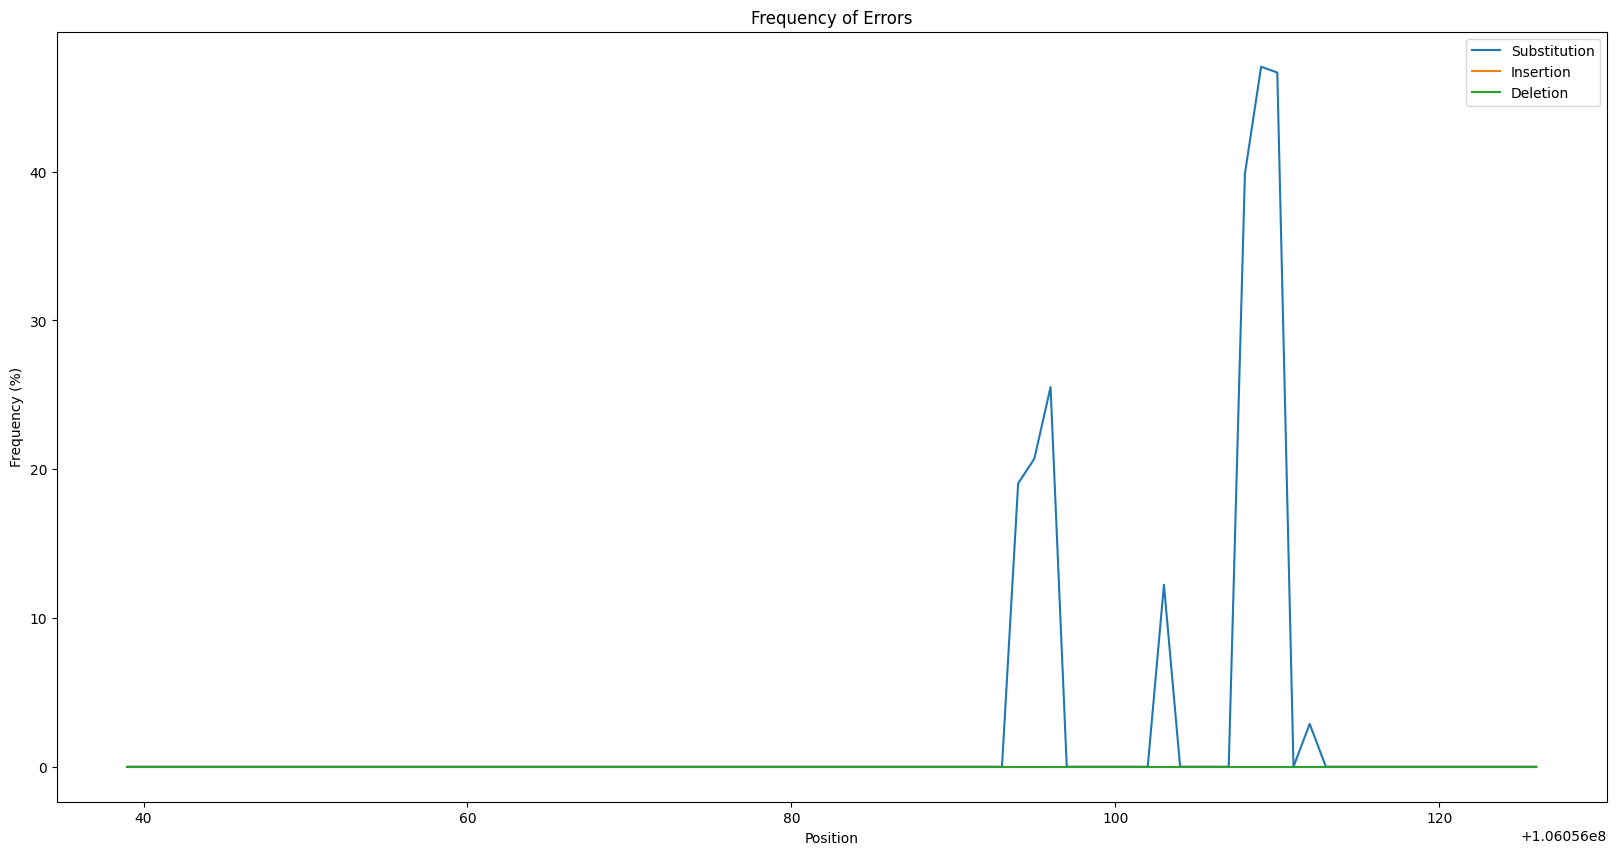

In [47]:
# Plot the figure with x-axis as position and y-axis as frequency
plt.figure(figsize=(20, 10))

plt.plot(df_merged['pos'], df_merged['substitution_percent'], label='Substitution')
plt.plot(df_merged['pos'], df_merged['insertion_percent'], label='Insertion')
plt.plot(df_merged['pos'], df_merged['deletion_percent'], label='Deletion')

plt.xlabel('Position')
plt.ylabel('Frequency (%)')
plt.title('Frequency of Errors')
plt.legend()
plt.show()

# # make plot smoother
# from scipy import interpolate
# x = df_merged['pos']
# y = df_merged['substitution_percent']
# f = interpolate.make_interp_spline(x, y)
# xnew = np.linspace(x.min(), x.max(), 1000)
# y_smooth = f(xnew)
# plt.plot(xnew, y_smooth)

Download mm39 mouse genome

In [34]:
!gunzip ./chr9.fa.gz

gzip: ./chr9.fa.gz: No such file or directory


In [48]:
!samtools mpileup -f chr9.fa CLIP-let7g.bam > CLIP-let7g_ref.pileup

[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000


In [49]:
!head CLIP-let7g_ref.pileup

chr9	106007092	a	9	^G,^I,^H,^I,^G,^G,^H,^I,^I,	<IFIGGHII
chr9	106007093	g	9	,,,,,,,,,	AFGIEGDII
chr9	106007094	c	9	,,,,,,,,,	EHHIGAFEH
chr9	106007095	a	9	,,,,,,,,,	?HDIFA>II
chr9	106007096	a	9	,,,,,,,,,	EHHIG@CHH
chr9	106007097	t	9	,,,,,,,,,	=HGEGDFII
chr9	106007098	a	9	,,,,,,,,,	?HHIGDEII
chr9	106007099	g	9	,-2aa,-2aa,-2aa,-2aa,-2aa,-2aa,-2aa,-2aa,-2aa	?IEHGEDII
chr9	106007100	a	9	*********	8IBIBC@EI
chr9	106007101	a	9	*********	8IBIBC@EI


In [50]:
!awk '$2 >= 106056039 && $2 <= 106056126 { print $0; }' CLIP-let7g_ref.pileup > CLIP-let7g_ref-gene.pileup

In [51]:
!tail CLIP-let7g_ref-gene.pileup

chr9	106056117	C	138	<<<<<<<<<.................................................................................................................................	BHEIG?DIIHGHII:;HGIIDGGGIIBGEB?>H<GGIIIIDIIGFHIHH9IGG=GGHIDH?DGIBIIHHGGIEIGI8GIDHDG.GGHEDIIDIDGDHIDGIFGHG;DCDDHEE@I?CGG:IHGIBGIHIIDG@DHIGG
chr9	106056118	C	139	<<<<<<<<<..................................................................................................................................	BHEIG?DIIHGHII3AHIIIDGGGIIB3EHFBH>GIIIIIIIIIHIIHHAIIGBDGHIDH?GIIGIIHHDIIHIGIGGI=BGG9GIHHHIIGI=IAIIGGIEHGIEBG@DHDE;IBDGG4IGGIGGIIIIGGGDGIH1G
chr9	106056119	T	138	<<<<<<<<<..........................$....$...............$....$.......$.........................................................................	BHEIG?DIIGEFII:/GIIEDDHDIIF>BH3<HB>GIE>GFIEIBEIBE:HHG>>EE>DH7BII>GEHHDHIHDEIGEEDHGG;GIEGHHEGD:IGHD:GGEHH?3G87HD</I=DGG=IHHIHBIFII@<HDHHH1G
chr9	106056120	T	133	<<<<<<<<<............................$....$...$..........$........$........

# 35L33G


In [52]:
pileup_file = 'CLIP-let7g_ref-gene.pileup'

# Dictionaries to store error frequencies for substitutions, deletions, and insertions
substitution_frequencies = {}
deletion_frequencies = {}
insertion_frequencies = {}

# Open the pileup file
with open(pileup_file, "r") as file:
    # Iterate over each line in the pileup file
    for line in file:
        # Split the line into columns
        columns = line.strip().split("\t")
        position = int(columns[1]) - 1  # Convert 1-based to 0-based position
        reference_base = columns[2]
        coverage = int(columns[3])
        bases = columns[4]
        qualities = columns[5]

        # Iterate over each base in the pileup
        for i in range(len(bases)):
            base = bases[i]

            # Check if the base is a substitution, deletion, or insertion
            if base != reference_base:
                if base == '.' or base == ',':
                    # Substitution
                    substitution_frequencies[position] = substitution_frequencies.get(position, 0) + 1
                elif base == '*':
                    # Deletion
                    deletion_frequencies[position] = deletion_frequencies.get(position, 0) + 1
                elif base == '+' or base == '-':
                    # Insertion
                    insertion_frequencies[position] = insertion_frequencies.get(position, 0) + 1

# Prepare the data for plotting
positions = list(substitution_frequencies.keys())
substitution_freq = list(substitution_frequencies.values())
deletion_freq = list(deletion_frequencies.values())
insertion_freq = list(insertion_frequencies.values())



In [53]:
# insertion_frequencies to dataframe with columns: position, insertion_freq
df_insertion = pd.DataFrame.from_dict(insertion_frequencies, orient='index', columns=['insertion_freq'])
df_insertion['position'] = df_insertion.index
df_insertion = df_insertion.reset_index(drop=True)

# same for deletion and substitution
df_deletion = pd.DataFrame.from_dict(deletion_frequencies, orient='index', columns=['deletion_freq'])
df_deletion['position'] = df_deletion.index
df_deletion = df_deletion.reset_index(drop=True)

df_substitution = pd.DataFrame.from_dict(substitution_frequencies, orient='index', columns=['substitution_freq'])
df_substitution['position'] = df_substitution.index
df_substitution = df_substitution.reset_index(drop=True)

# merge all three dataframes by position
df_merged = pd.merge(df_insertion, df_deletion, on='position', how='outer')
df_merged = pd.merge(df_merged, df_substitution, on='position', how='outer')
df_merged = df_merged.fillna(0)
df_merged['position'] = df_merged['position'] + 1



In [54]:
# merge df_merged with pileup
df_merged = pd.merge(df_merged, pileup, left_on='position', right_on='pos', how='outer')
df_merged = df_merged.fillna(0)
df_merged = df_merged.drop(['position'], axis=1)
df_merged['count'] = df_merged['count'].astype(int)
df_merged['insertion_freq'] = df_merged['insertion_freq'].astype(int)
df_merged['deletion_freq'] = df_merged['deletion_freq'].astype(int)
df_merged['substitution_freq'] = df_merged['substitution_freq'].astype(int)
df_merged['substitution_percent'] = df_merged['substitution_freq'] / df_merged['count'] * 100
df_merged['insertion_percent'] = df_merged['insertion_freq'] / df_merged['count'] * 100
df_merged['deletion_percent'] = df_merged['deletion_freq'] / df_merged['count'] * 100
df_merged['substitution_percent'] = df_merged['substitution_percent'].round(2)
df_merged['insertion_percent'] = df_merged['insertion_percent'].round(2)
df_merged['deletion_percent'] = df_merged['deletion_percent'].round(2)

# sort by position
df_merged = df_merged.sort_values(by=['pos'])
df_merged = df_merged.reset_index(drop=True)



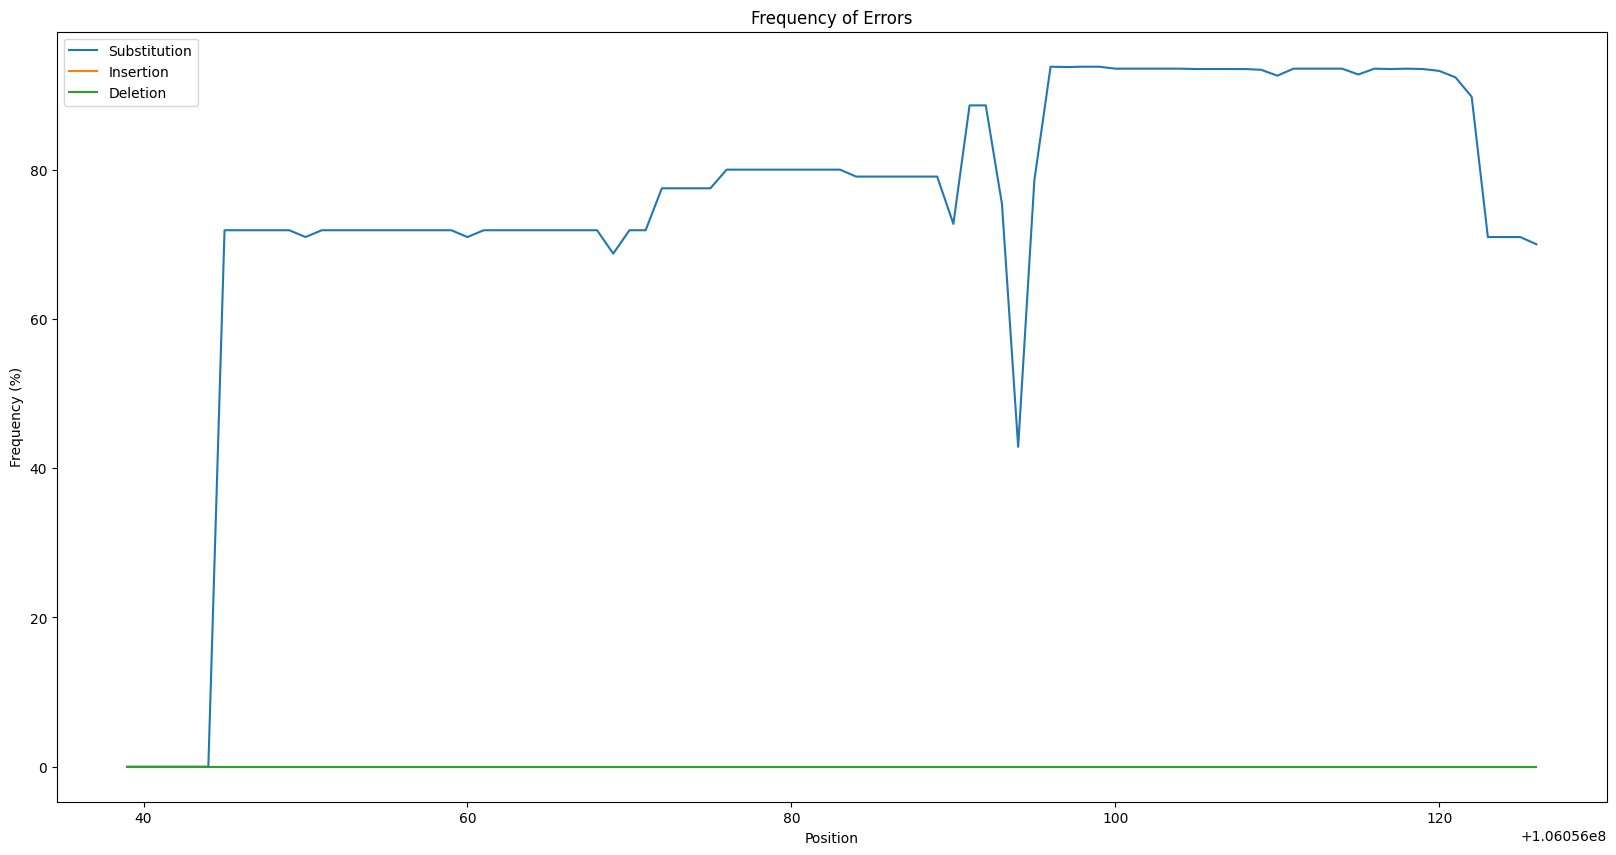

In [55]:
# Plot the figure with x-axis as position and y-axis as frequency
plt.figure(figsize=(20, 10))

plt.plot(df_merged['pos'], df_merged['substitution_percent'], label='Substitution')
plt.plot(df_merged['pos'], df_merged['insertion_percent'], label='Insertion')
plt.plot(df_merged['pos'], df_merged['deletion_percent'], label='Deletion')

plt.xlabel('Position')
plt.ylabel('Frequency (%)')
plt.title('Frequency of Errors')
plt.legend()
plt.show()

# # make plot smoother
# from scipy import interpolate
# x = df_merged['pos']
# y = df_merged['substitution_percent']
# f = interpolate.make_interp_spline(x, y)
# xnew = np.linspace(x.min(), x.max(), 1000)
# y_smooth = f(xnew)
# plt.plot(xnew, y_smooth)